In [29]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
img_pipe = cv2.imread('Task_3_pipe_counting.jpeg')

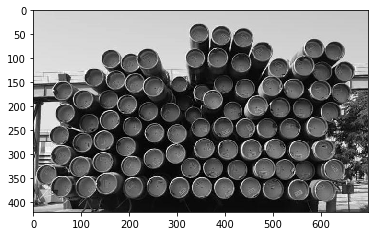

In [9]:
# here convert the RGB image to Grayscale because there are many algorithms that are customized to work only
# on grayscaled images e.g. Canny edge detection function pre-implemented in OpenCV library works on Grayscaled images only.
gray = cv2.cvtColor(img_pipe , cv2.COLOR_BGR2GRAY)
plt.imshow(gray , cmap ='gray')

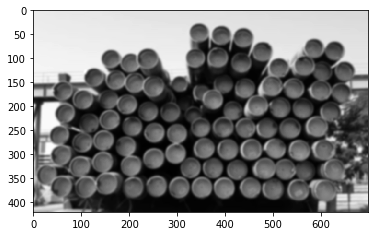

In [10]:
# use GaussianBlur to reduce the noise and details of the image
blur_pipe = cv2.GaussianBlur(gray, (11,11)  ,0)
plt.imshow(blur_pipe , cmap ='gray')

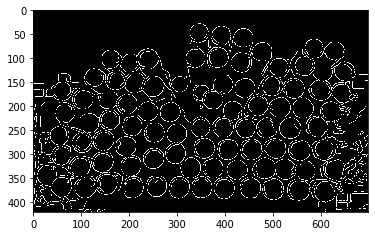

In [18]:
# To detect the edges we use canny edge detector .
# canny use two thresholds,here the threshold is [30 ,150] then the edge pixels above the upper limit(150) 
# are considered and edge pixels below the threshold(30) are discarded. 
# pixels in between upper and lower threshold are considered only if they are connected to pixels in the upper threshold.
canny_pipe = cv2.Canny(blur_pipe , 30 ,95 , 3)
plt.imshow(canny_pipe , cmap ='gray')

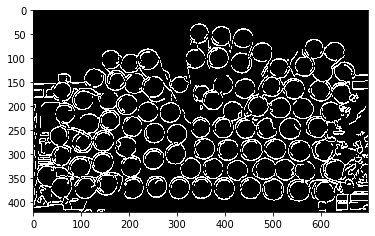

In [19]:
# use dilate to increase the object area and accentuate(more noticeable) the features
# now edges are more clear.
dilated_pipe = cv2.dilate(canny_pipe , (1,1) , iterations =2) 
plt.imshow(dilated_pipe , cmap ='gray')

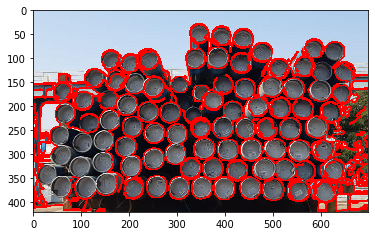

In [20]:
# find contour on image
(cnt , hierarchy) = cv2.findContours(dilated_pipe.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
RGB =  cv2.cvtColor(img_pipe , cv2.COLOR_BGR2RGB)
cv2.drawContours(RGB , cnt , -1 , (255,0,0) , 2)
plt.imshow(RGB)

In [21]:
len(cnt)

94

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# function to count the pipes in the given image
def pipe_count(img):
    gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    blur_img = cv2.GaussianBlur(gray_img, (11,11)  ,0)
    canny_img = cv2.Canny(blur_img , 30 ,95 , 3)
    dilated_img = cv2.dilate(canny_img , (1,1) , iterations =2) 
    (cnt , hierarchy) = cv2.findContours(dilated_img , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
    return len(cnt) 

In [3]:
img = cv2.imread('Task_3_pipe_counting.jpeg')
pipe_count(img)

94